# Part II - Ford GoBike Data Visualization
## by Arthur Monteiro

## Investigation Overview

I foccused on find relations between the stations that people get and leave the bicycles. Including in this relation the duration of time that people rent the bike, the day of the week and the hour of the day.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This project will analyze the data collected from users of the GoBike program for February 2019. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import set_bins, plot_histogram

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902_master_go_ford.csv')

## Distribution of the distance between stations in kilometer

In the chart below it's possible to see how the data it's distributed on the dataset. The orange line marks everyone that left the bike on some station with less than 1 km of distance and the black line marks where the data hits 96%.

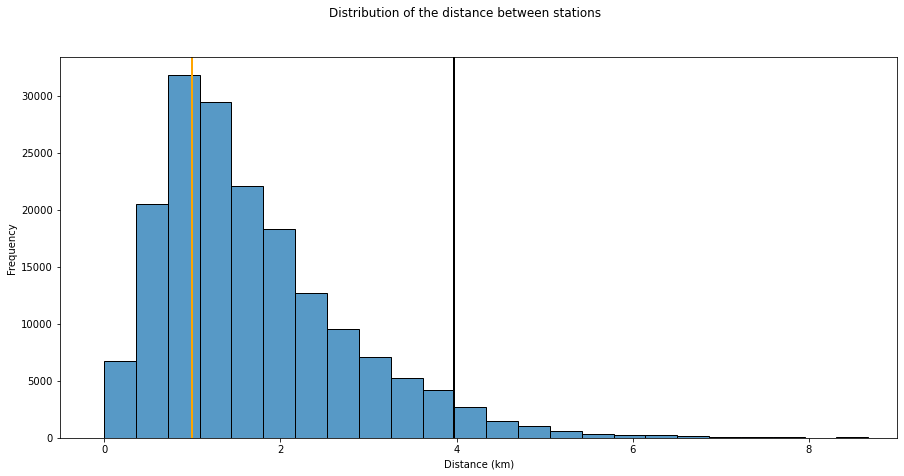

In [3]:
distance_lower_1km = (df.distance_km < 1).mean() *100
plt.figure(figsize=(15, 7))
plot_histogram(df, 'distance_km', 96)
plt.axvline(np.percentile(df.distance_km, distance_lower_1km), color='orange', linewidth=2)
plt.xlabel('Distance (km)');
plt.xlim(-.5, 9)
plt.suptitle('Distribution of the distance between stations');

## Relation of the duration in seconds and the distance in kilometers

In the chart below, we see the linear relation among the duration in seconds duration that users rented the bike and the distance between the stations.

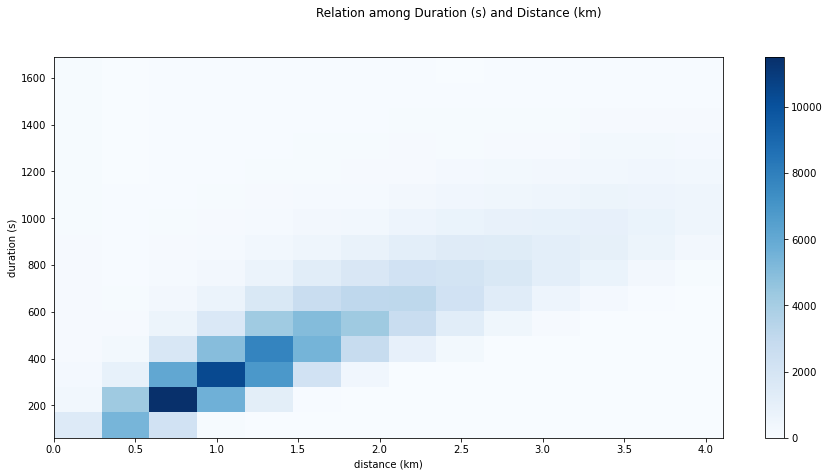

In [4]:
#the plot above looks a bit messy, let's use a heat map to depict the data.
plt.figure(figsize=[15, 7])

duration_sec_96 = np.percentile(df.duration_sec, 96)
distance_km_96 = np.percentile(df.distance_km, 96)

bins_y = set_bins(df.query('duration_sec <= @duration_sec_96'), 'duration_sec')
bins_x = set_bins(df.query('distance_km <= @distance_km_96'), 'distance_km')

plt.hist2d(data = df, x = 'distance_km', y='duration_sec',
           bins = [bins_x, bins_y], cmap ='Blues')

plt.ylabel('duration (s)')
plt.xlabel('distance (km)')

plt.suptitle('Relation among Duration (s) and Distance (km)')

plt.colorbar()
plt.show()

## Distribution of the hours rented among the days of the week

In the below chart, it's possible to see the bimodal distribution during the week days (Monday to Friday) at 8 o'clock and 17 o'clock. And it's also possible to see the normal distribution that follows on the weekends.


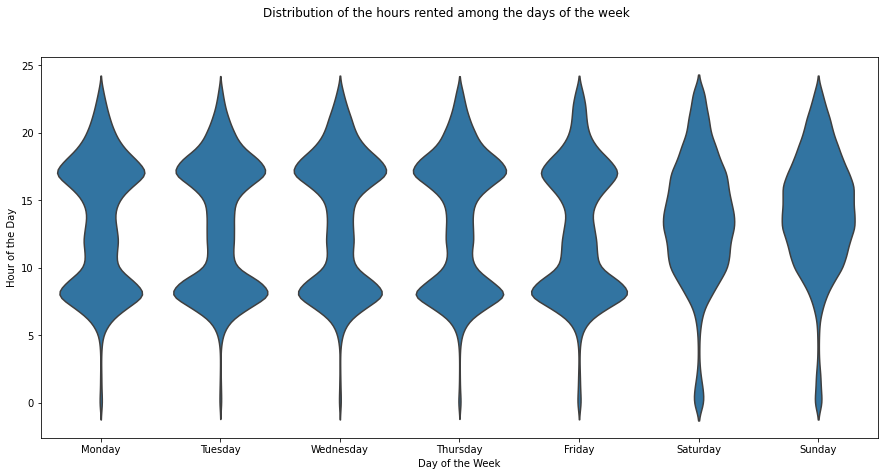

In [5]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=[15, 7])
base_color = sns.color_palette()[0]

sns.violinplot(y='start_hour', x='start_weekday', data=df, order=ordered_days, color=base_color, inner=None);
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.suptitle('Distribution of the hours rented among the days of the week')
plt.show()

In [6]:
!jupyter nbconvert Part_II_slide_go_ford.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_go_ford.ipynb to slides
[NbConvertApp] Writing 707257 bytes to Part_II_slide_go_ford.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_go_ford.slides.html
Use Control-C to stop this server
^C

Interrupted
